# Week 3 Assignment 4
##### Team 5

#### The dataset, collected by Davis et al in the 1930s, shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

#### Goal: Make inferences about the relationships between (1) the women, and (2) the social events. 

### Import data and plot

In [6]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.davis_southern_women_graph()
women = ["Evelyn Jefferson",
             "Laura Mandeville",
             "Theresa Anderson",
             "Brenda Rogers",
             "Charlotte McDowd",
             "Frances Anderson",
             "Eleanor Nye",
             "Pearl Oglethorpe",
             "Ruth DeSand",
             "Verne Sanderson",
             "Myra Liddel",
             "Katherina Rogers",
             "Sylvia Avondale",
             "Nora Fayette",
             "Helen Lloyd",
             "Dorothy Murchison",
             "Olivia Carleton",
             "Flora Price"]
clubs = ["E1",
              "E2",
              "E3",
              "E4",
              "E5",
              "E6",
              "E7",
              "E8",
              "E9",
              "E10",
              "E11",
              "E12",
              "E13",
              "E14"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))

Biadjacency matrix
[[ 1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.

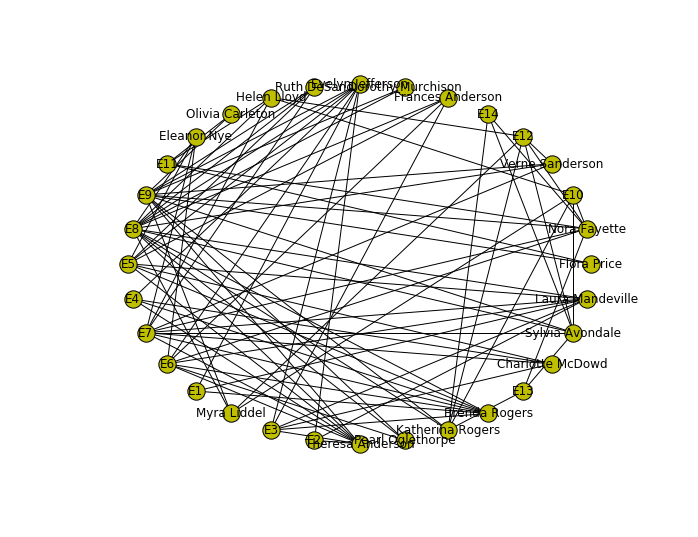

In [7]:
plt.figure(figsize=(9,7))
nx.draw_circular(G, with_labels=True, node_color="y")

##### Plot relationship between women

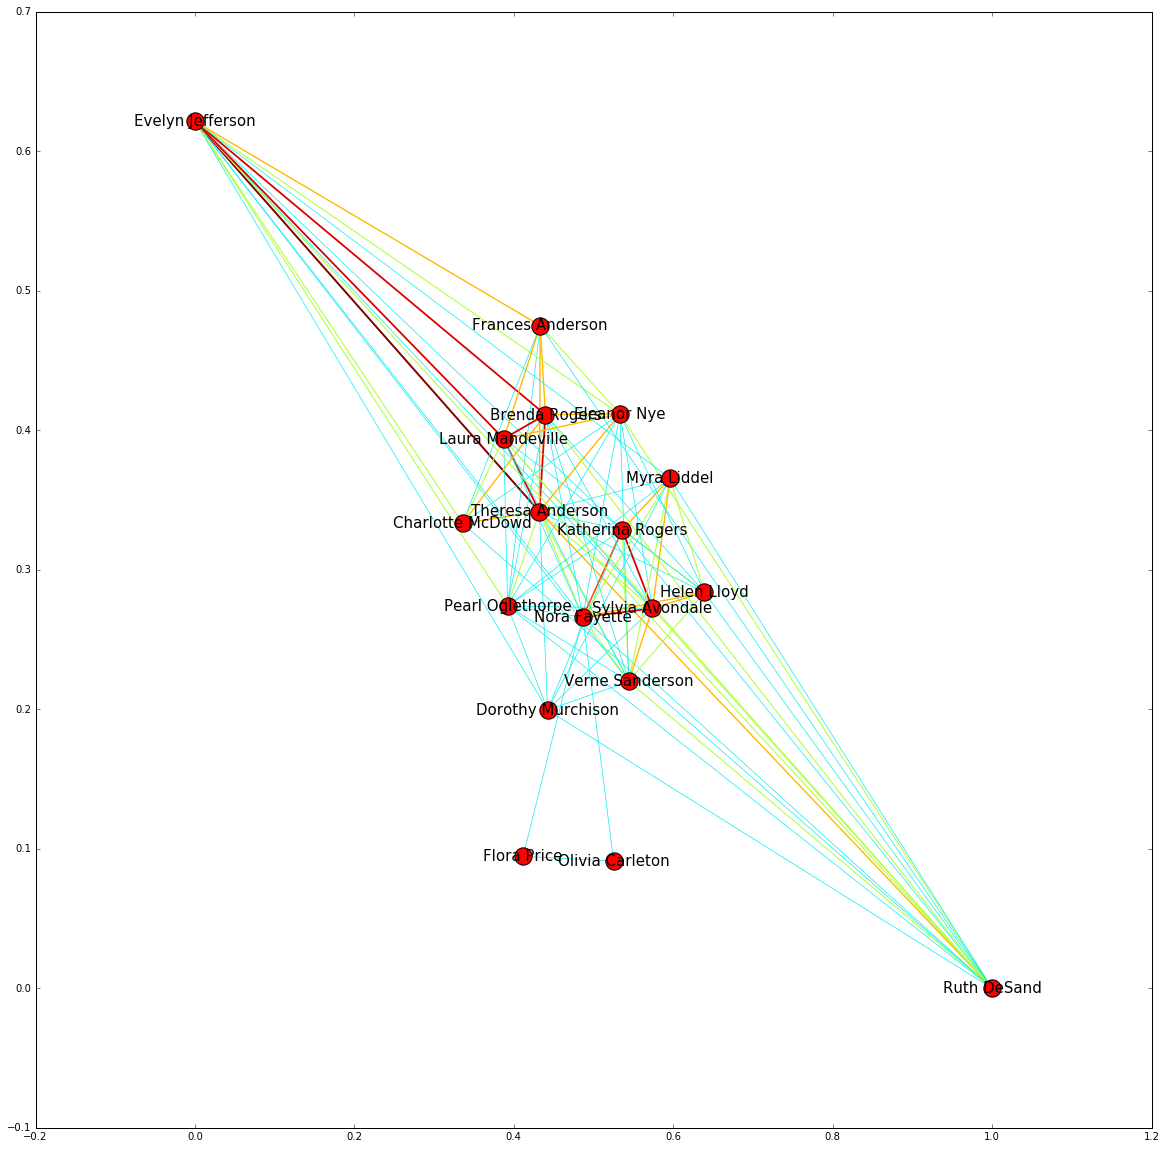

In [8]:
plt.figure(figsize=(20,20))
womnet = bipartite.weighted_projected_graph(G, women, ratio=False)
weights = [math.log(edata['weight']) for f,t,edata in womnet.edges(data=True)]
womplot = nx.draw_networkx(womnet,width=weights, edge_color=weights, font_size=15)
womplot

(array([ 22.,   0.,  15.,   0.,   0.,   1.,   0.,   7.,   0.,   1.]),
 array([ 3. ,  3.4,  3.8,  4.2,  4.6,  5. ,  5.4,  5.8,  6.2,  6.6,  7. ]),
 <a list of 10 Patch objects>)

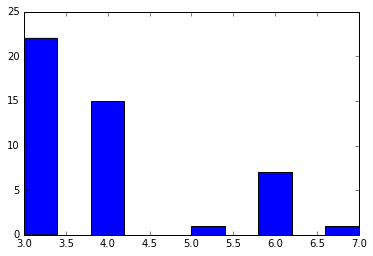

In [22]:
# In order to see the clusters, we must trim the individuals that are more "free-floaters"
# Then, we create a histogram where we see the weight each individual has in relation to others before plotting our new clusters
def trim_edges(G, weight=1):
    NewG = nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['weight'] > weight:
            NewG.add_edge(f,to,edata)
    return NewG
plt.hist(weights)

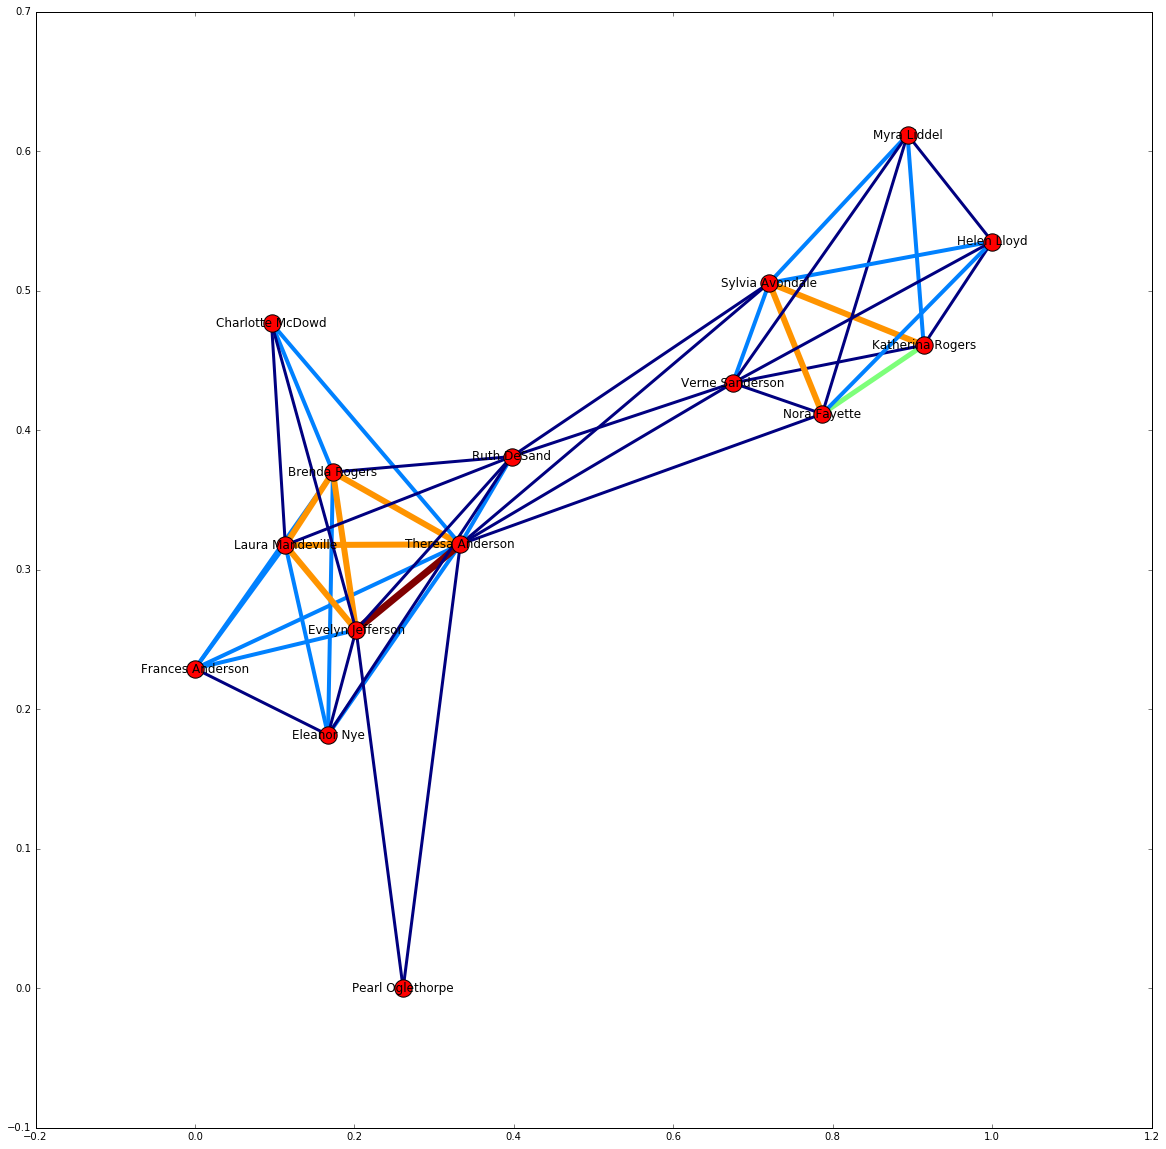

In [23]:
# Now that we know what our weights are, we plot the new cluster graph
plt.figure(figsize=(20,20))
trimmed_plot = trim_edges(womnet, weight=math.exp(0.9))
weights = [edata['weight'] for f,t,edata in trimmed_plot.edges(data=True)]
nx.draw_networkx(trimmed_plot,width=weights, edge_color=weights)

##### Plot relationship between clubs

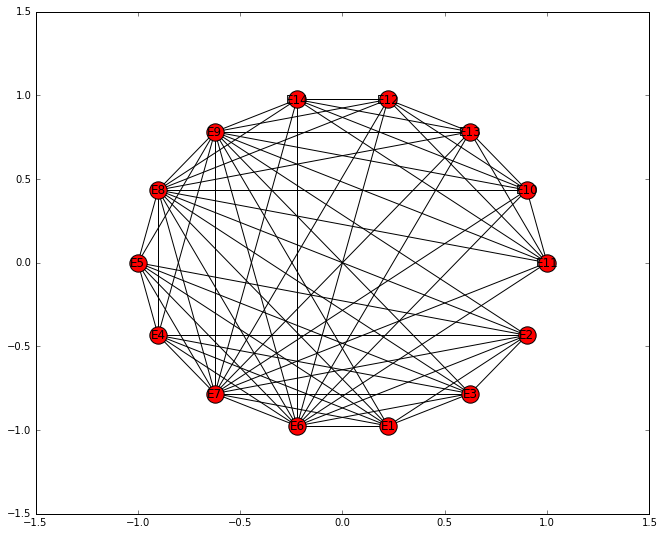

In [6]:
plt.figure(figsize=(11,9))
clubnet = bipartite.weighted_projected_graph(G, clubs, ratio=False)
clubplot = nx.draw_networkx(clubnet,pos=nx.shell_layout(clubnet))
clubplot

##### Find the number of triangles that include a node as one vertex

In [35]:
# Self loops are ignored
# Women triangles
nx.triangles(womnet)

{'Brenda Rogers': 101,
 'Charlotte McDowd': 55,
 'Dorothy Murchison': 112,
 'Eleanor Nye': 101,
 'Evelyn Jefferson': 122,
 'Flora Price': 66,
 'Frances Anderson': 101,
 'Helen Lloyd': 122,
 'Katherina Rogers': 112,
 'Laura Mandeville': 101,
 'Myra Liddel': 112,
 'Nora Fayette': 122,
 'Olivia Carleton': 66,
 'Pearl Oglethorpe': 112,
 'Ruth DeSand': 122,
 'Sylvia Avondale': 122,
 'Theresa Anderson': 122,
 'Verne Sanderson': 122}

In [34]:
# Club triangles
nx.triangles(clubnet)

{'E1': 28,
 'E10': 28,
 'E11': 28,
 'E12': 28,
 'E13': 28,
 'E14': 28,
 'E2': 28,
 'E3': 28,
 'E4': 28,
 'E5': 28,
 'E6': 53,
 'E7': 53,
 'E8': 53,
 'E9': 53}

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for women

In [23]:
# Function where you enter the graph (either women nodes or club nodes, and it returns the table)
def CentralTable(graph):
    degr = nx.degree(graph)
    degc = nx.degree_centrality(graph)
    betwc = nx.betweenness_centrality(graph)
    closec = nx.closeness_centrality(graph)
    eigenc = nx.eigenvector_centrality_numpy(graph)
    
    table = [[name,degr[name], round(degc[name],3), round(betwc[name],3), round(closec[name],3), round(eigenc[name],3)] for name in graph.nodes()]
    table = sorted(table,key = lambda x: -x[2])
    centable = PrettyTable(['Name','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
    
    for i in range(0, len(table)):
        centable.add_row(table[i])
    return centable

In [27]:
print(CentralTable(womnet))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|        Name       | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.354    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.253    |
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.273    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.231    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.249    |
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.319    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.207    |
|  Pearl Oglethorpe |   16   |       0.941       |    0.005    |   0.944   |    0.194    |

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for clubs

In [28]:
print(CentralTable(clubnet))

+------+--------+-------------------+-------------+-----------+-------------+
| Name | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+------+--------+-------------------+-------------+-----------+-------------+
|  E9  |   13   |        1.0        |     0.08    |    1.0    |    0.352    |
|  E8  |   13   |        1.0        |     0.08    |    1.0    |    0.453    |
|  E7  |   13   |        1.0        |     0.08    |    1.0    |    0.377    |
|  E6  |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
| E11  |   8    |       0.615       |     0.0     |   0.722   |    0.101    |
| E10  |   8    |       0.615       |     0.0     |   0.722   |    0.187    |
| E13  |   8    |       0.615       |     0.0     |   0.722   |    0.132    |
| E12  |   8    |       0.615       |     0.0     |   0.722   |    0.216    |
| E14  |   8    |       0.615       |     0.0     |   0.722   |    0.132    |
|  E5  |   8    |       0.615       |     0.0     |   0.722   | 

#### Conclusion 

##### Friends/Members initial data:


##### Plot between women:

Based on the plot of the women weighted graph, we can see two main component subgraphs. These could be indicative of a formal organization of those groups of women, or perhaps subtle relationship differences, cliques.

Also, on the pre weight filtered plot, we can see that Evelyn Jefferson and Ruth DeSand seem to have unique relationships with their respective cliques, and relatively fewer edges with the opposite cliques. 

##### Plot between clubs: 
E2 and E11 are unique in that they did not share any attendees, but they also were associated with events that tended to share less attendees.

##### Triads:
Women:

Clubs: The majority of the clubs are equally connected, shown by how the number of triangles to include a club node as a vertex is consistantly 28. However, four clubs (E6-E9) had higher (and equal among themselves) numbers of triangles, showing that they have more member overlap than the other clubs. If someone wished to pass a message to as many women as possible with one try, one of these four clubs would be the one to attend.

##### Table for women:

While some women were marginally more popular/influential based on their centrality scores, it is difficult to infer too much from these tables as 83% of women attended a party with at least 15 of the 17 remaining women.

The other thing that jumps out is that 3 of the women (Flora Price, Olivia Carleton, and Charlotte McDowd) had lower centrality scores. The first two in particular were less clustered with either group, indicating some unique property about their attendance.

##### Table for clubs:

E6-9 exhibited the greatest degree of centrality uniformly. These events included attendees from both of the 2 main "cliques" observed earlier. The other events had lesser centrality due to the fact that they were more (although not completely) localized among their respective cliques.